# Основы работы с табличными данными

#### Полезные ссылки
1. https://pandas.pydata.org/docs/
2. https://matplotlib.org/stable/index.html

### Базовые преобразования данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/test.csv')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### 1.1 Выведите 15 последних строк датасета

In [3]:
df.tail(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
403,1295,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
406,1298,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S


##### 1.2 Удалите колонки PassengerId, Ticket и Name

In [4]:
df.drop(columns=['PassengerId', 'Ticket', 'Name'], inplace=True)

##### 1.3 Выведите количество пропущенных значений в каждом столбце.

In [22]:
df.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin        326
Embarked       0
age_20_35      0
age_35_50      0
age_50_80      0
dtype: int64

##### 1.4 Заполните пропуски в колонке Age средним значением, в колонке Embarked модой.

После этого удалите все строки, в которых всё ещё остались незаполненные поля.

Какими ещё значениями можно заменить пропуcки?

In [9]:
from sklearn.impute import SimpleImputer
import numpy as np

# (mean, median or most frequent)

imp_age = SimpleImputer(missing_values=np.nan, strategy="mean")
imp_emb = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

df['Age'] = imp_age.fit_transform(df[['Age']])

In [21]:
df.dropna(subset=['Age', 'Fare'], inplace=True)

In [11]:
df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


##### 1.5 Добавье три новых бинарных признака: входит ли человек в группу от 20 до 35 лет, от 35 до 50, от 50 до 80.
##### Выведите количество объектов в каждой новой колонке.

In [12]:
df['age_20_35'] = ((df['Age'] >= 20) & (df['Age'] <= 35))
df['age_35_50'] = ((df['Age'] > 35) & (df['Age'] <= 50))
df['age_50_80'] = ((df['Age'] > 50) & (df['Age'] <= 80))
a, b, c = df['age_20_35'].value_counts(), df['age_35_50'].value_counts(), df['age_50_80'].value_counts()
print(a)
print(b)
print(c)

age_20_35
True     252
False    166
Name: count, dtype: int64
age_35_50
False    344
True      74
Name: count, dtype: int64
age_50_80
False    387
True      31
Name: count, dtype: int64


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Sex        418 non-null    object 
 2   Age        418 non-null    float64
 3   SibSp      418 non-null    int64  
 4   Parch      418 non-null    int64  
 5   Fare       417 non-null    float64
 6   Cabin      91 non-null     object 
 7   Embarked   418 non-null    object 
 8   age_20_35  418 non-null    bool   
 9   age_35_50  418 non-null    bool   
 10  age_50_80  418 non-null    bool   
dtypes: bool(3), float64(2), int64(3), object(3)
memory usage: 27.5+ KB


##### 1.6* Преобразование категориальных данных.
Как вы можете заметить по данным, существуют разные типы значений: категориальные и числовые (на самом деле, существуют и другие).
Для анализа данных принято категориальные значения приводить в числовой вид. Существуют различные способы таких преобразований.
Одни из самых простых - label encoding и one hot encoding.

1. Label encoding: каждому уникальному значению в колонке присваиваем собственный номер от 0 до (количество классов - 1) 
2. One hot encoding: пусть признак содержит n уникальных значений. Мы создаем n новых бинарных признаков, отражающих, имеется ли данный признак у объекта (1) или нет (0).
Пример:

(тут будет картинка)

В последующих занятиях мы детально разберем подобные преобразования и разницу между ними.

Теперь задание: создайте 2 новых датафрейма: one_hot_encoded_dataframe и label_encoded_dataframe, 
в которых категориальные признаки будут закодированы с помощью one hot encoding и label encoding соотствественно.

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label_encoded = df.apply(lambda x: le.fit_transform(x))
onehot_encoded = pd.get_dummies(df)

In [59]:
label_encoded

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,age_20_35,age_35_50,age_50_80
0,2,1,45,0,0,24,76,1,1,0,0
1,2,0,61,1,0,5,76,2,0,1,0
2,1,1,74,0,0,41,76,1,0,0,1
3,2,1,34,0,0,34,76,2,1,0,0
4,2,0,27,1,1,46,76,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
413,2,1,39,0,0,31,76,2,1,0,0
414,0,0,52,0,0,154,22,0,0,1,0
415,2,1,51,0,0,9,76,2,0,1,0
416,2,1,39,0,0,31,76,2,1,0,0


In [58]:
onehot_encoded

,Pclass,Age,SibSp,Parch,Fare,age_20_35,age_35_50,age_50_80,Sex_female,Sex_male,...,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50000,0,0,7.8292,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,3,47.00000,1,0,7.0000,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,2,62.00000,0,0,9.6875,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
3,3,27.00000,0,0,8.6625,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,3,22.00000,1,1,12.2875,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
414,1,39.00000,0,0,108.9000,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
415,3,38.50000,0,0,7.2500,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
416,3,30.27259,0,0,8.0500,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


### Визуализация 

##### 2.1 Для колонок Pclass, Sex, Age, Parch, Embarked постройте гистограмму с помощью matplotlib.

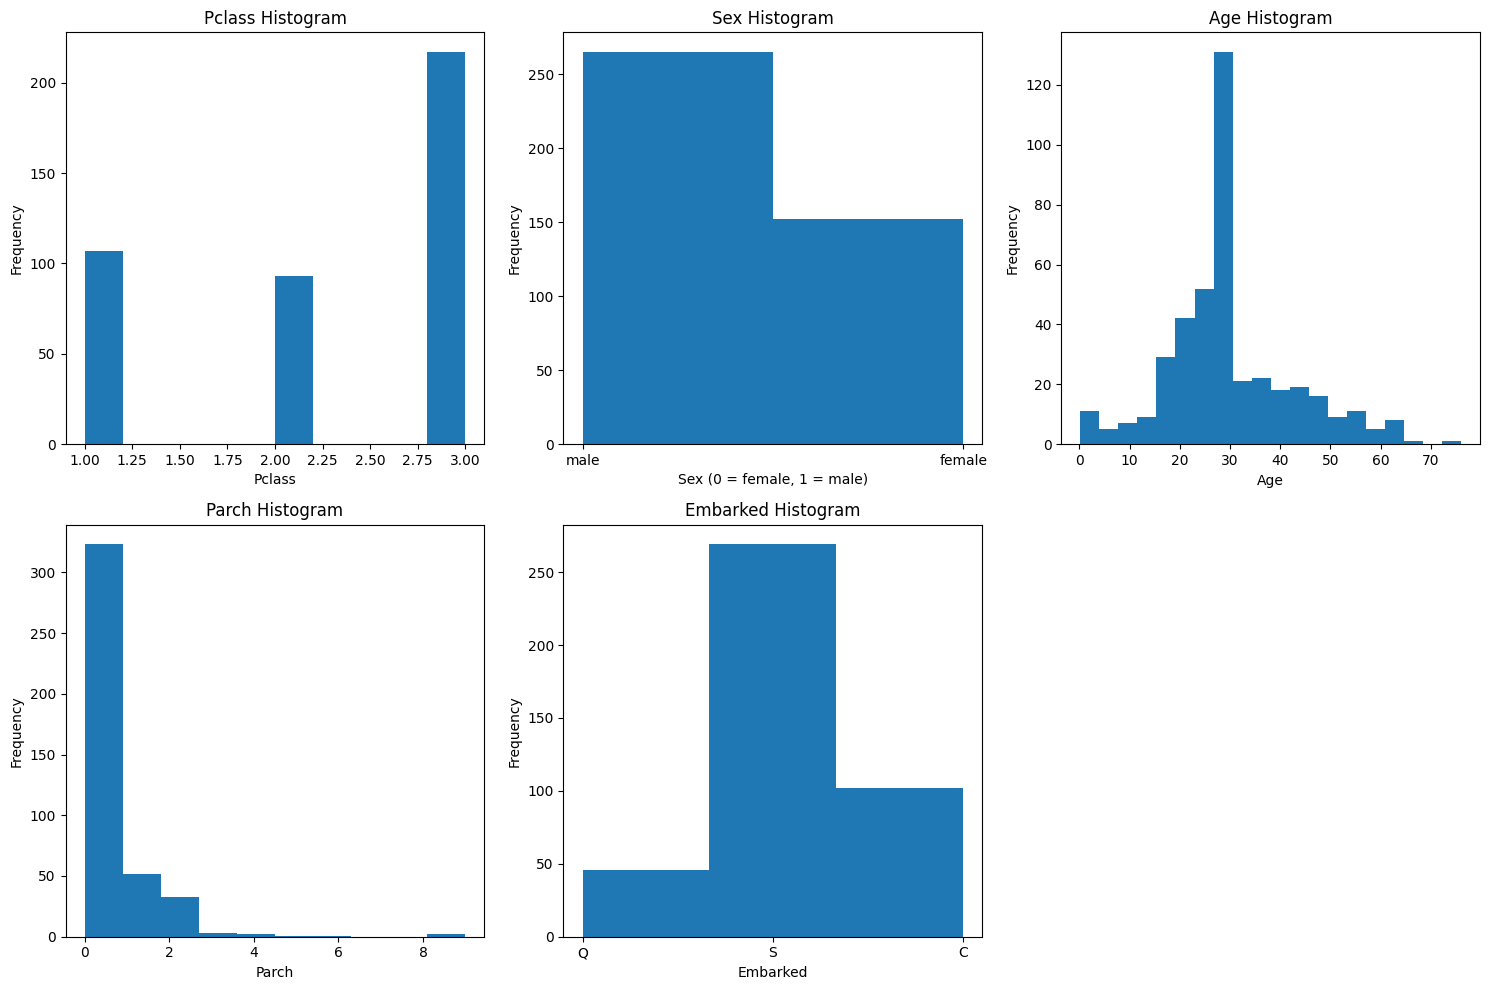

In [62]:
import matplotlib.pyplot as plt

# Создаем фигуру для отображения нескольких графиков
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 строки и 3 столбца

axs[0, 0].hist(df['Pclass'])
axs[0, 0].set_title('Pclass Histogram')
axs[0, 0].set_xlabel('Pclass')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(df['Sex'], bins=2)
axs[0, 1].set_title('Sex Histogram')
axs[0, 1].set_xlabel('Sex (0 = female, 1 = male)')
axs[0, 1].set_ylabel('Frequency')

axs[0, 2].hist(df['Age'], bins=20)
axs[0, 2].set_title('Age Histogram')
axs[0, 2].set_xlabel('Age')
axs[0, 2].set_ylabel('Frequency')

axs[1, 0].hist(df['Parch'], bins=10)
axs[1, 0].set_title('Parch Histogram')
axs[1, 0].set_xlabel('Parch')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(df['Embarked'], bins=3)
axs[1, 1].set_title('Embarked Histogram')
axs[1, 1].set_xlabel('Embarked')
axs[1, 1].set_ylabel('Frequency')

axs[1, 2].axis('off')
plt.tight_layout()
plt.show()


##### 2.2 Постройте круговую диаграмму, отражающую распределение значений колонки Survived

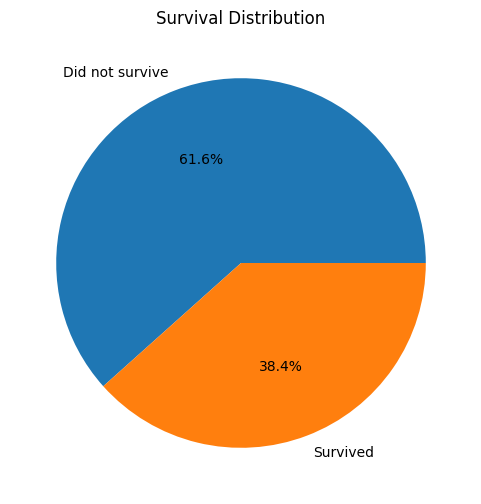

In [74]:
df_train = pd.read_csv("data/train.csv")
plt.figure(figsize=(6, 6))
plt.pie(df_train['Survived'].value_counts(), labels=['Did not survive', 'Survived'], autopct='%1.1f%%')
plt.title('Survival Distribution')
plt.show()